<a href="https://colab.research.google.com/github/Shruti002/fire_detection/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIGIT CLASSIFICATION USING DEEP LEARNING **

importing the dependencies

In [1]:
import numpy as np
#we convert image data to numpy array
import matplotlib.pyplot as plt
#graph implementation
import seaborn as sns
#seaborn is also used for graph
import cv2
from google.colab.patches  import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix




**loading the MNIST data from keras.datasets**


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
#data type--> numpy
type(X_train)

numpy.ndarray

In [4]:
#shape of numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
# o/p: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
# this means X_train has 60000 images and each img has DIMENSION of 28x28 pixels


#number of TRAINING DATA-->60000
#number of TESTING DATA-->10000

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


TRAINING DATA=**60K IMAGES**

TEST DATA=**10K IMAGES**

Grayscale Image= *1 color channel*

In [5]:
#printing 10th img

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

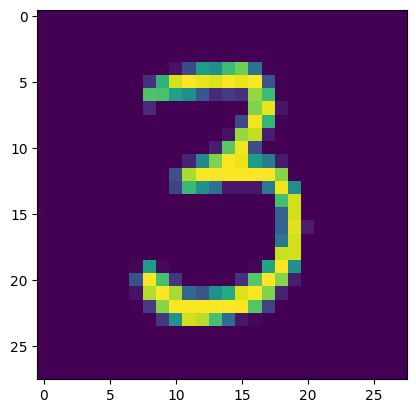

3


In [6]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label-->
print(Y_train[50])

**Image Lables**


In [7]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


**UNIQUE VALUES PRESENT**

In [8]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels are such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset.

If not we have to resize all the images to a common dimension

In [9]:
#scaling the values
#we divide with the max value present in the dataset
X_train = X_train/255 #to increase accuracy
X_test = X_test/255

# min value==> 0/255= 0
# max value==> 1/255= 1

In [10]:
#printing 10th img

print(X_train[10])

# we get all values between 0-1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

BUILDING THE **NEURAL NETWORK**

We are not using cnn (convolution)

we are using rnn (recuring)

In [11]:
# Setting up the LAYERS OF NN

# flatten-->we feed the data in 1D array & not in matrix (2D) form
# dense--> we have 50 neurons , RELU(rectified linear unit) is an activation function
# last layer is output layer--> (10) means number of unique values in dataset=>10

model=keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')


])

In [12]:
# compiling the NN


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# training the NN

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2969 - accuracy: 0.9153
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1392 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1051 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0839 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0704 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0420 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.036

Training data accuracy is ==> 0.9887 =98.87%

**Accuracy on Test data**

In [14]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1035 - accuracy: 0.9713
0.9713000059127808


Test data accuracy is ==> 0.973 = 97.3%

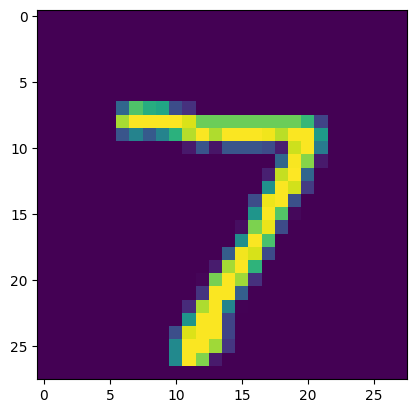

In [15]:
#first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [16]:
#label of 1st data point

print(Y_test[0])

7


In [17]:
#predictions made by the model
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
print(y_pred[0])

[1.0510652e-05 1.1658399e-01 2.5925061e-01 9.5051378e-01 2.7892954e-08
 2.2829407e-01 3.3459866e-08 9.9999696e-01 3.0419655e-02 3.2140873e-02]


model.predict() gives the prediction probability of each class for that data point


In [19]:
#converting the prediction probabilities to class labels

#argmax-> tells the index of max value in the array
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [20]:
#converting the prediction probability to class label for ALL test data points

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

y_pred_labels --> Predicted labels

**CONFUSION MATRIX**

In [21]:
conf=confusion_matrix(Y_test, y_pred_labels)

In [22]:
print(conf)

tf.Tensor(
[[ 965    0    3    1    3    3    2    1    2    0]
 [   0 1128    4    0    0    1    1    0    1    0]
 [   3    4  999    6    3    1    5    3    8    0]
 [   1    1    4  976    0    8    1    5    3   11]
 [   2    0    2    0  966    1    5    2    1    3]
 [   3    0    0    8    1  872    2    0    3    3]
 [   7    3    2    1    2    9  934    0    0    0]
 [   1    8    7    2    4    0    1  996    3    6]
 [   5    0    3    7    5    7    2    3  937    5]
 [   1    3    0    9   39    9    1    3    4  940]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Truth')

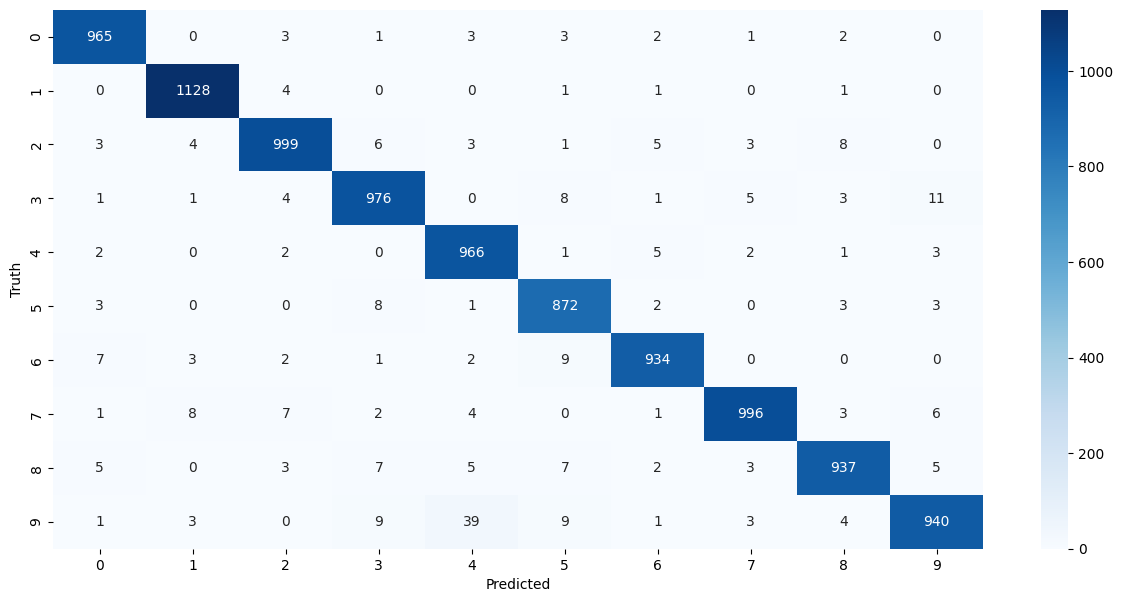

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(conf,annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Building a Predictive System

In [67]:
input_image_path='/three.png'
input_image =cv2.imread(input_image_path)

In [68]:
!pip install opencv-python

# Import the module
import cv2

In [69]:
input_image_path='/content/three.png'
input_image =cv2.imread(input_image_path)

In [70]:
type(input_image)

numpy.ndarray

In [71]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [72]:
input_image.shape

(318, 318, 3)

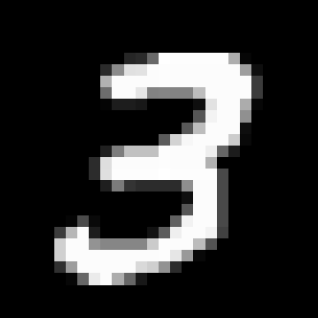

In [73]:
cv2_imshow(input_image)

In [74]:
#converting to grey scale img

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [75]:
grayscale.shape

(318, 318)

In [76]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [77]:
cv2_imshow(input_image_resize)

In [78]:
input_image_resize=input_image_resize/255

In [79]:
# (1,28,28) --> means predicting 1 image of dimension 28x28
image_reshaped=np.reshape(input_image_resize,(1,28,28))

In [80]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[2.6380614e-04 2.1345517e-08 1.2937722e-01 1.0000000e+00 2.1734803e-10
  5.2180043e-03 3.7385680e-15 2.3138081e-03 3.5003470e-03 2.0085752e-01]]


In [81]:
input_pred_label=np.argmax(input_prediction)

In [82]:
print(input_pred_label)

3


#PREDICTIVE SYSTEM

In [ ]:
#asks the url of the image from the user
input_image_path=input("Enter path of the img to be predicted :")
input_image=cv2.imread(input_image_path)
#displaying the img to the user
cv2_imshow(input_image)

# convert to gray scale
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
#resizing the img
input_image_resize=cv2.resize(grayscale,(28,28))
#scaling the img
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,(1,28,28))
#prediction
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

print("Handwritten digit is recognised as :", input_pred_label)